<a href="https://colab.research.google.com/github/yeymix/bootcampIA/blob/main/TallerClustering_DBSCAN_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")

# Procesamiento de los datos.

In [3]:
uploaded = files.upload()

Saving wine-clustering.csv to wine-clustering.csv


In [4]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


# Escalado de los datos

In [63]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Reducción de dimensiones

In [6]:
# Reducción de dimensiones a 2D para visualización
pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaled_df)
data_2d

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

# Aplicación del algoritmo DBSCAN

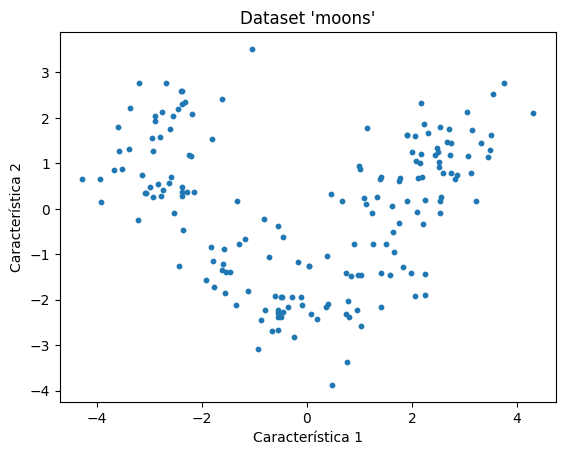

In [7]:
# Visualizamos el dataset
plt.scatter(data_2d[:, 0], data_2d[:, 1], s=10, cmap='plasma')
plt.title("Dataset 'moons'")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [31]:
# Estimación de distancias K-vecinos
min_samples = 4
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data_2d)
distances, indices = neighbors_fit.kneighbors(data_2d)


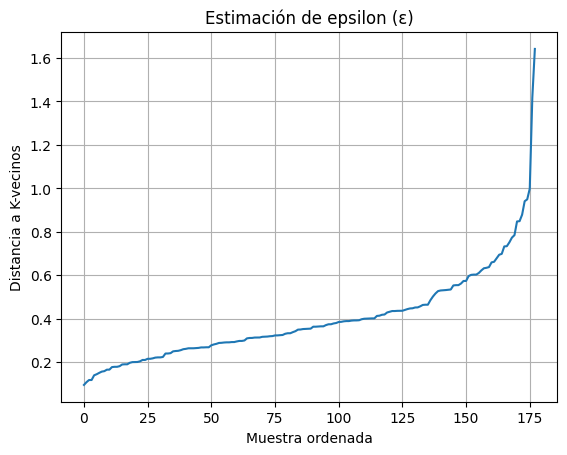

In [32]:
# Ordenamos las distancias para encontrar el "codo"
# distances = np.sort(distances[:, 3], axis=0)  # Tomamos la cuarta columna (k=4)
distances = np.sort(distances[:, min_samples - 1], axis=0)
plt.plot(distances)
plt.ylabel("Distancia a K-vecinos")
plt.xlabel("Muestra ordenada")
plt.title("Estimación de epsilon (ε)")
plt.grid(True)
plt.show()

In [76]:
dbscan = DBSCAN(eps=0.55, min_samples=5)
clusters = dbscan.fit_predict(data_2d)

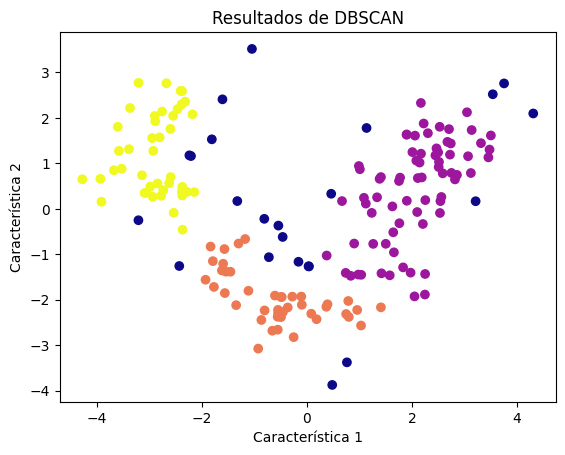

In [77]:
# Crear gráfico de dispersión
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='plasma')
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Resultados de DBSCAN")
plt.show()



## Coeficiende de Silueta

In [59]:
sil_score = silhouette_score(data_2d, clusters)
print(f"Índice de Silueta: {sil_score}")

Índice de Silueta: 0.40815942562739777


## Índices de Davies-Bouldin

In [61]:
# Calcular el Índice de Davies-Bouldin
dbi = davies_bouldin_score(data_2d, clusters)
print(f'Índice de Davies-Bouldin: {dbi}')

Índice de Davies-Bouldin: 1.5169853289275754


## Calinski-Harabasz.

In [62]:
# Calcular el Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(data_2d, clusters)
print(f'Índice de Calinski-Harabasz: {ch_score}')

Índice de Calinski-Harabasz: 134.51756987979454


# Buscando los mejores valores para DBSCAN

In [64]:
# Rango de valores de min_samples
min_samples_range = range(2, 21)
silhouette_scores = []

# Fijamos un epsilon aproximado utilizando el método de los K-vecinos
epsilon = 0.55

# Aplicamos DBSCAN con diferentes valores de min_samples
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_2d)

    # Filtramos el ruido antes de calcular el índice de silueta
    if len(set(clusters)) > 1:  # Al menos debe haber más de un cluster
        score = silhouette_score(data_2d, clusters)
    else:
        score = -1  # Si no se forman clusters, asignamos -1
    silhouette_scores.append(score)


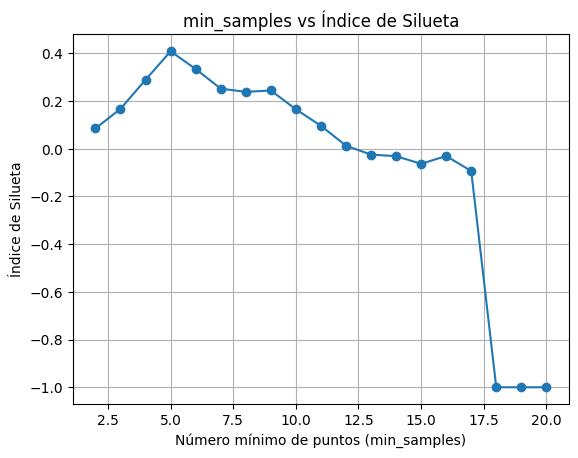

In [67]:
# Graficamos el número mínimo de puntos vs índice de silueta
plt.plot(min_samples_range, silhouette_scores, marker='o')
plt.title("min_samples vs Índice de Silueta")
plt.xlabel("Número mínimo de puntos (min_samples)")
plt.grid(True)
plt.ylabel("Índice de Silueta");